In [78]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [79]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [80]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [81]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [82]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_9992\3646528746.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  base.prepare(engine, reflect = True)


In [83]:
# View all of the classes that automap found
base.classes.keys()

['station', 'measurement']

In [84]:
# Save references to each table
measurement = base.classes.measurement

station = base.classes.station


In [85]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [86]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()
most_recent_date

'2017-08-23'

<function matplotlib.pyplot.show(close=None, block=None)>

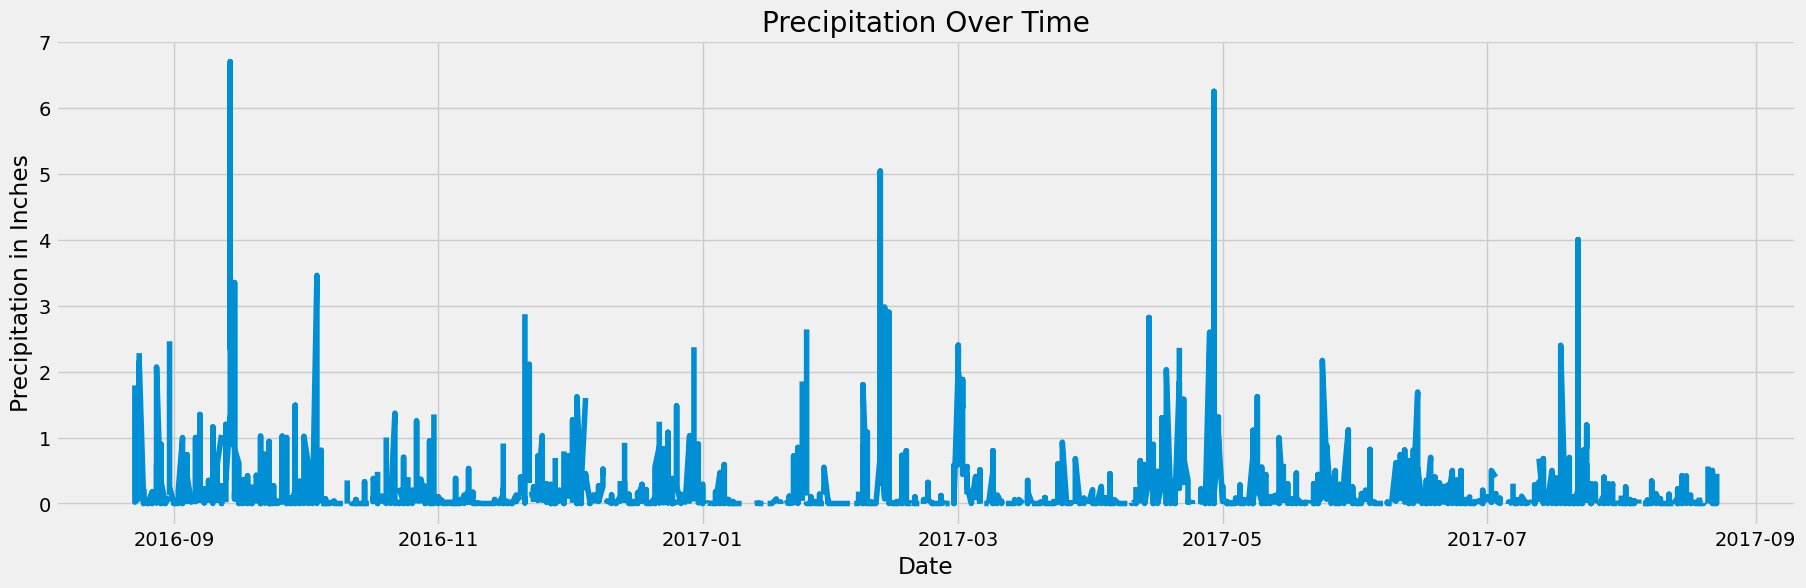

In [87]:
 # Calculate the date one year from the last date in data set.

one_year_date = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores

precipitation_query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_date.strftime("%Y-%m-%d")).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precipitation_df = pd.DataFrame(precipitation_query, columns = ["Date", "Precipitation"])

# Sort the dataframe by date

precipitation_df["Date"] = pd.to_datetime(precipitation_df["Date"])

precipitation_df = precipitation_df.sort_values(by = ["Date"], ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize = (20,6))
plt.title("Precipitation Over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
plt.plot(precipitation_df["Date"], precipitation_df["Precipitation"])
plt.show

In [88]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_summary = pd.DataFrame(precipitation_df["Precipitation"].describe())
precipitation_summary

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [89]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(measurement.station).distinct().count()
num_stations

9

In [90]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
active_station_list = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
# List the stations and their counts in descending order.
active_station_df = pd.DataFrame(active_station_list, columns = ["Station", "Rows"])
active_station_df

,Station,Rows
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [91]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_station_df["Station"].loc[active_station_df["Rows"].idxmax()]

most_active_min = session.query(func.min(measurement.tobs)).filter(measurement.station == most_active_station).all()

most_active_max = session.query(func.max(measurement.tobs)).filter(measurement.station == most_active_station).all()

most_active_mean = session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active_station).all()

print(f"The lowest temperature is {most_active_min[0][0]} degrees, the highest temperature is {most_active_max[0][0]} degrees, and the average temperature is {most_active_mean[0][0]} degrees")

The lowest temperature is 54.0 degrees, the highest temperature is 85.0 degrees, and the average temperature is 71.66378066378067 degrees


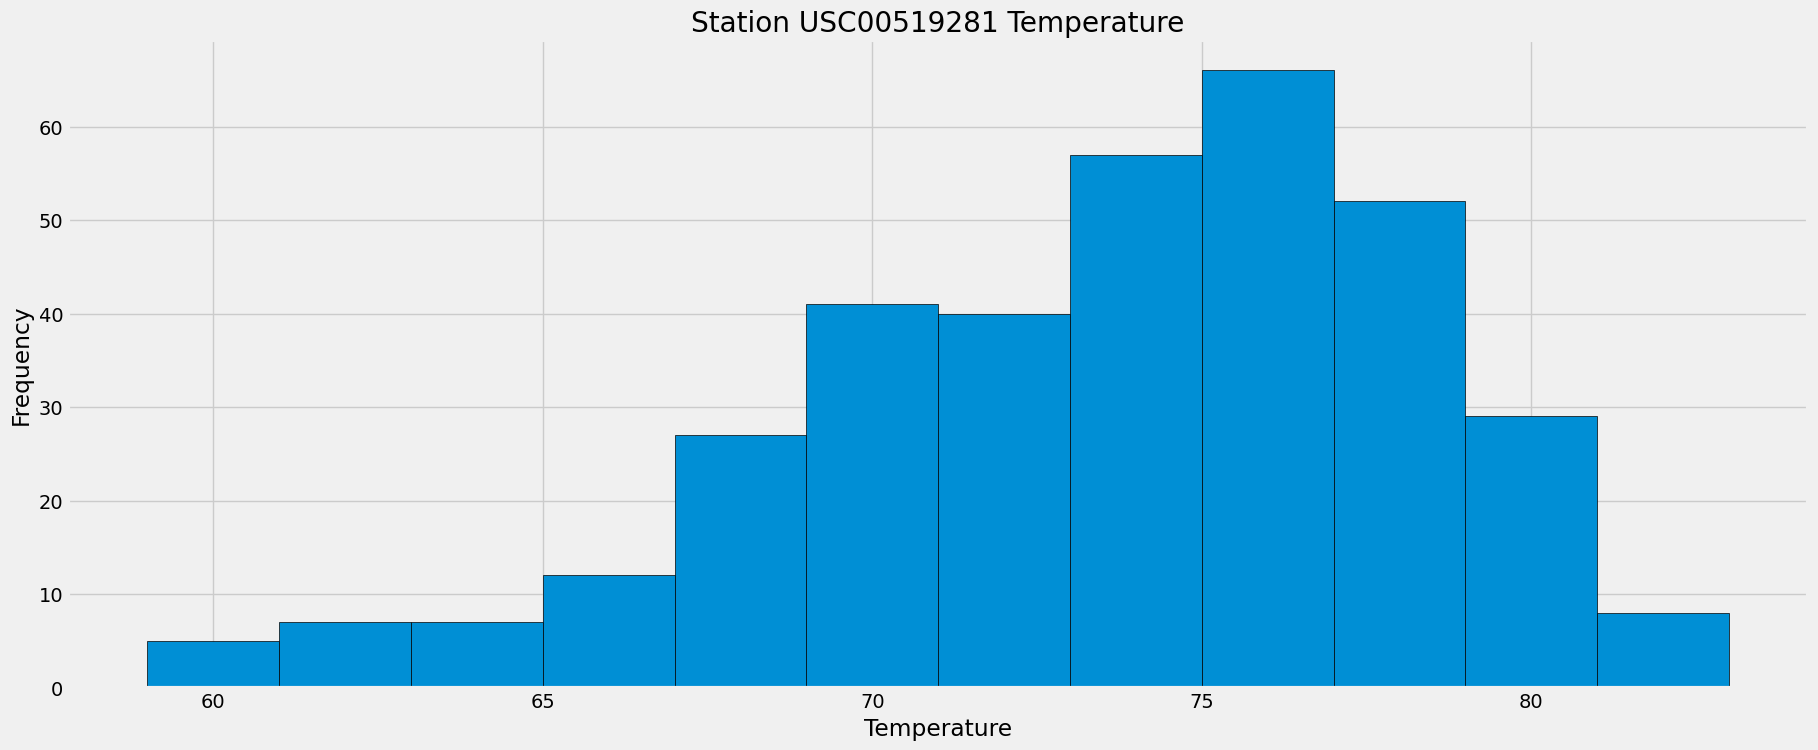

In [92]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_results_query = session.query(measurement.tobs).filter(measurement.station == most_active_station).filter(measurement.date >= one_year_date).all()

temperatures = [temp[0] for temp in most_active_results_query]
plt.figure(figsize = (20,8))
plt.title(f"Station {most_active_station} Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.hist(temperatures, bins = 12, edgecolor = "black")
plt.show()

# Close Session

In [93]:
# Close Session
session.close()